# Lecture XII: N-Body problem in Cosmology

This lecture is introducing the N-Body problem with a veri simple initial condition set and a somehow sophysticated integration method: the leap-frog.

Better and faster methods exists but they are outside the scope of this course.

## Introduction to the problem

The N-Body codes originated to study the evolution of many-particle self gravitating systems as globular clusters but also, in the cosmological framework the Dark Matter (DM).

Dark matter is an important component of the Universe. All observational evidence indicates that it dominates dynamics of galaxies, galaxy clusters, the formation of pancakes, voids, filaments of the large scale structures.

The dark matter is likely made of particles that other than the gravity force do not couple with the other matter.

The first (somewhat) realistic N-body simulation – collapse of a cloud of 300 self-interacting particles – was done by P.J.E. Peebles Peebles (1970).

With the development of computer hardware and new numerical algorithms N-body simulations became more realistic. 

Development of numerical methods was crucial for advances in N-body simulations. At the beginning direct summation technique was used to run the simulations (Peebles 1970; White 1976; Aarseth et al. 1979).

The number of operations in the direct summation method scales as $\propto N^2$ , where $N$ is the number of particles.

A simulation with $N = 10^5 -- 10^6$ paticles, is relatively fast (from few hours to few days). Such simulations can be very useful for testing different ideas and for small runs.

**Particle-Mesh** method (Klypin & Shandarin 1983; Hockney & Eastwood 1988; Klypin & Holtzman 1997) was a big step forward with cpu scaling ~ N. However, it requires a large 3D mesh for computation of the gravitational potential.

## Simple N-Body Equations


We start discussion of numerical techniques with a very simple case: forces are estimated by summing up all contributions from all particles and with every particle moving
with the same time-step. The computational cost is dominated by the force calculations that scale as $N^2$, where $N$ is the number of particles in the simulation.

The problem that we try to solve numerically is the following. For given coordinates $\mathbf{r}_{init}$ and velocities $\mathbf{v}_{init}$ of $N$ massive particles at moment $t = t_{init}$ find their velocities $\mathbf{v}$ and coordinates $\mathbf{r}$ at the next moment $t = t_{next}$ assuming that the particles interact only through the Newtonian force of gravity. If $\mathbf{r}_i$ and $m_i$ are the coordinates and masses of the particles, then the equations of motion are:

<div>
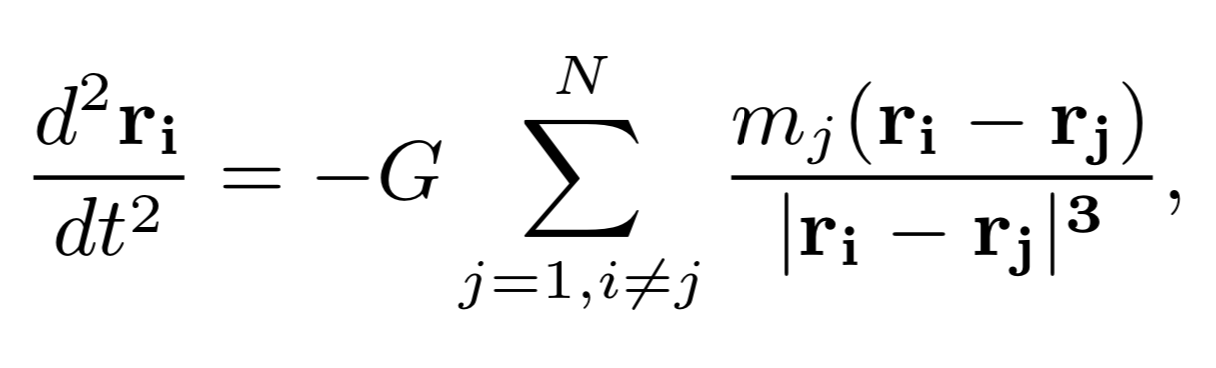
</div>

where $G$ is the gravitational constant (eq 1).

Now to make the integration we need to:

-  introduce force softening;
-  rescale variables;

### Force softening

we make the force weaker (“softer”) at small distances to **avoid very large accelerations**, 
when two particles collide or come very close to each other. 
This makes numerical integration schemes stable. 
Another reason for softening the force at small distances is that in cosmological environments, when one deals with galaxies, clusters of galaxies, or the large-scale structure, **effects of close collisions between individual particles are very small** and can be neglected. In other words, the force acting on a particle is dominated by the cumulative contribution of all particles, not by a few close individual companions.

We use the Plummer softening. It replaces the distance between particles 

$$\Delta r_{ij} = |r_i − r_j|$$

with

$$(\Delta r^2_{ij} +\epsilon^2)^{1/2}$$

where $\epsilon$ is the softening parameter.

### Rescale the variables

We need to introduce new variables to avoid dealing with too large or too small physical units of a real problem (we are in the Universe after all!!).

Suppose $M$ and $R$ are scales of mass and distances. These can be defined by a particular physical problem. For example, for simulations of an isolated galaxy M and R can be the total mass and the initial radius. 

The scale of time t0 is chosen as 
 
$$ t_0 = \bigg(\frac{GM}{R^3}\bigg)^{−1/2}.$$ 

Using M, R, and t0 we can change the physical variables $\mathbf{r}_i$ , $\mathbf{v}_i$ , $m_i$ into dimensionless variables using the following relations:


<div>
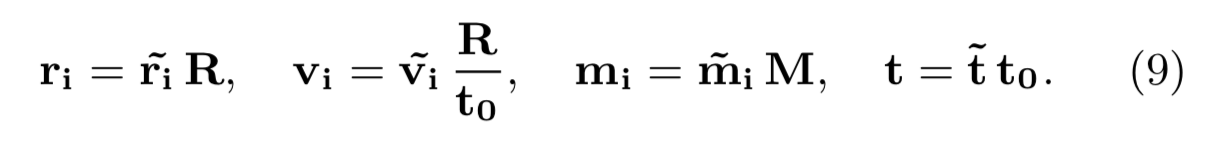
</div>

We now change the variables in eq (8) and use the Plummer softening:
<div>
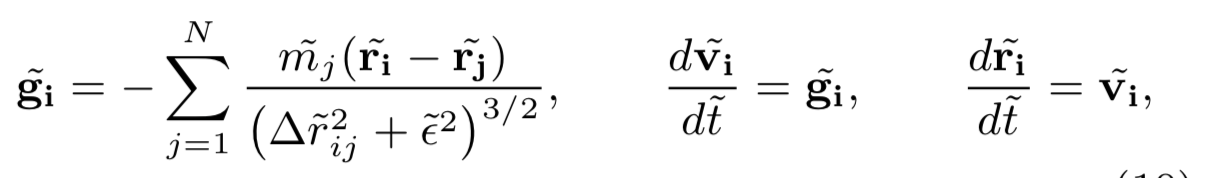
</div>

where $\mathbf{\tilde{g}}_i$ is the the dimensionless gravitational acceleration.

All numerical algorithms for solving these equations include three steps, which are repeated many times:

* find acceleration
* update velocity
* update coordinates

The algoritm scale as $N^2$ but thare are some triks to make it faster.  Particles can be assigned into groups according to their accelerations with each group having their own time step. In this case particles with large accelerations update their coordinates and accelerations more often while particles in low density (and acceleration) regions move with large time step, thus reducing the cost of their treatment. 

Calculations of the acceleration can be easily parallelized **using OpenMP** directives. These optimizations can speed up the code by hundreds of times making it a useful tool for simple simulations.



## Moving Particles

Numerical integration of equations of motion are relatively simple as compared with the other part of the N-body problem – the force calculations. Still, a wrong choice of parameters or an integrator can make a substantial impact on the accuracy of the final solution and on cpu time. 